# Exploratory Data Analysis (EDA) of Irish Accomodations Data from Fáilte Ireland

# 0. Tableau Dashboard Output

The interactive Tableau dashboard below showcases the results of my exploratory data analysis. You can explore it at the following link:

https://public.tableau.com/app/profile/stephenhasson/viz/IrelandTouristAccommodation/IrishTouristAccommodation#1

I used Python for data cleaning and transformation, which subsequently formed the basis for the Tableau visualisations and dashboard creation described below:

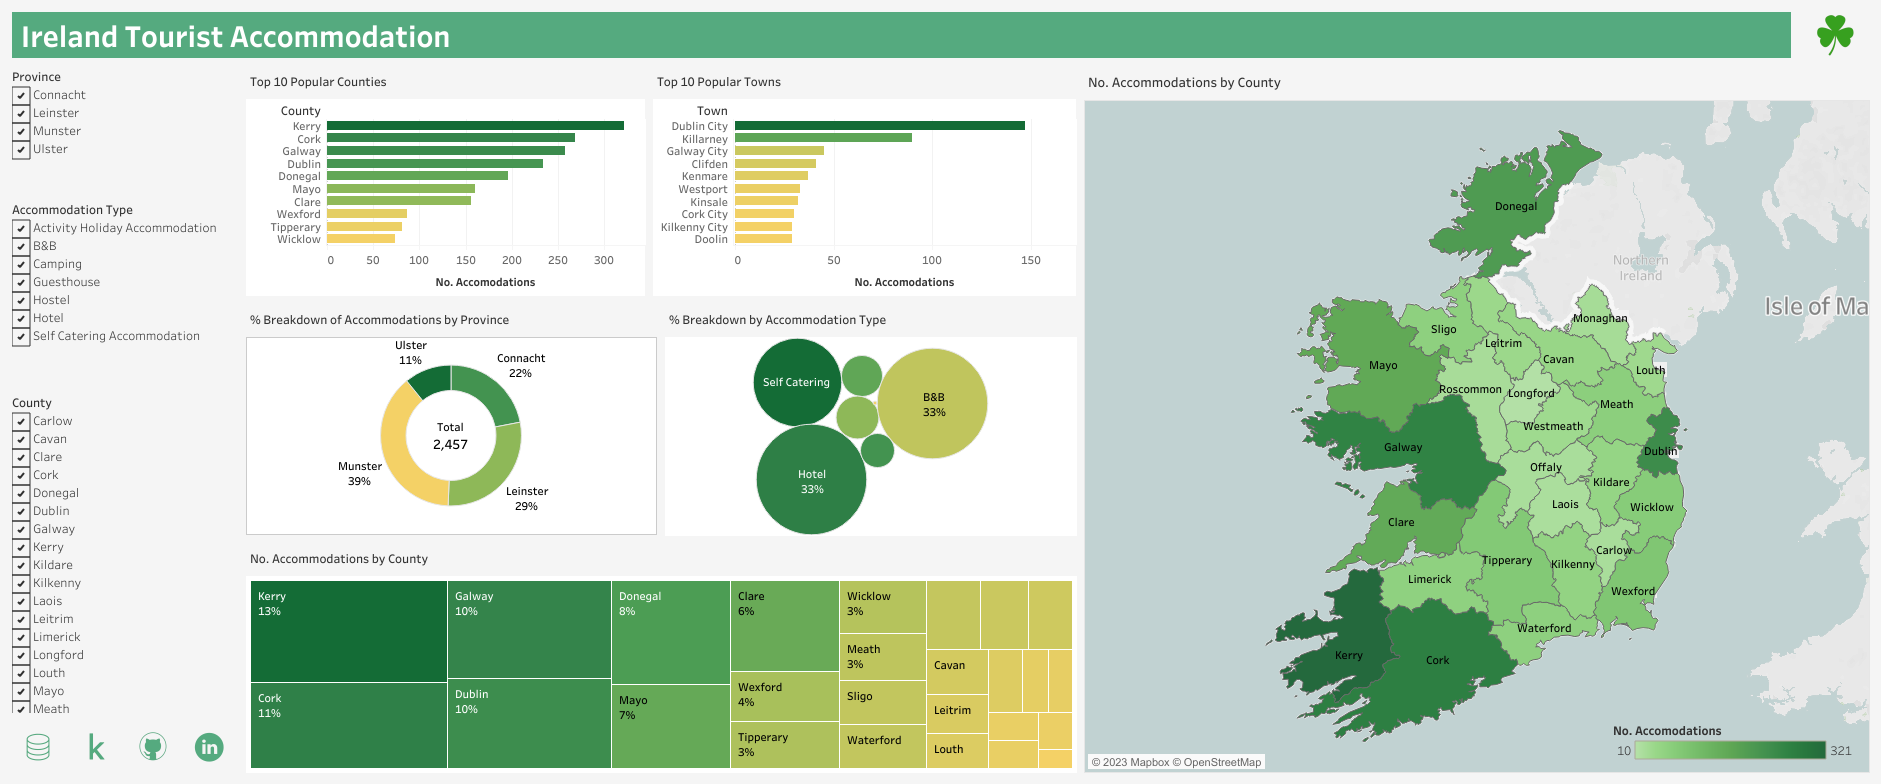

In [1]:
from IPython.display import Image
Image('/kaggle/input/irsh-accommodations-data/Ireland Tourist Accommodation.png')

# 1. Exploratory Analysis Topics

**Geographical Analysis:**

* Which regions (AddressRegion) have the most accommodations? Are there any clusters or patterns?
* Which AddressLocality has the highest number of accommodations?

**Type Analysis:**

* What are the different types of accommodations based on the Tags column? How are they distributed?
* Which type of accommodation is most prevalent in each region?

**General Analysis:**

* Are there accommodations with the same name but in different localities or regions?

**Website Availability:**

* What percentage of accommodations provide a URL?
* Are there certain regions where accommodations are more likely to have a website?

# 2. Data Preprocessing

In [2]:
# Import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Import csv dataset & convert to pandas dataframe (df), encoding is utf-8 to ensure special characters are read correctly
df = pd.read_csv('/kaggle/input/irish-accommodations-data/irish_accomodations.csv', encoding='utf-8')
                 
# Set the display.max_columns option to None to display all columns of the df
pd.set_option('display.max_columns', None)
                 
# Apply plot style 'seaborn' for visualisations                  
plt.style.use('seaborn')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/irsh-accommodations-data/no_accommodations_by_county.png
/kaggle/input/irsh-accommodations-data/Ireland Tourist Accommodation.png
/kaggle/input/irsh-accommodations-data/percentage_breakdown_of_accommodations_by_province.png
/kaggle/input/irsh-accommodations-data/no_accommodations_by_county_map.png
/kaggle/input/irsh-accommodations-data/top_10_popular_towns.png
/kaggle/input/irsh-accommodations-data/top_10_popular_counties.png
/kaggle/input/irsh-accommodations-data/Irish Tourist Accommodation.png
/kaggle/input/irsh-accommodations-data/percentage_breakdown_of_accommodations_with_website.png
/kaggle/input/irsh-accommodations-data/percentage_breakdown_of_accommodations_with_website_by_type.png
/kaggle/input/irsh-accommodations-data/distribution_of_accommodations_by_type.png
/kaggle/input/irsh-accommodations-data/distribution_of_accommodations_by_province.png
/kaggle/input/irsh-accommodations-data/accommodations_with_same_name_in_different_locations.png
/kaggle/input/irsh-acco

/tmp/ipykernel_20/825970349.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 3. Initial Data Exploration

In [3]:
# Create a copy of the df before any review or changes are made to the original
df = df.copy()

In [4]:
# Review the number of rows & columns of the df
df.shape

(2458, 9)

**Notes:**

* The dataset is relatively small & shouldn't take a long time to get a good grasp of

In [5]:
# Review the first 30 rows
df.head(30)

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Hideaway Camping and Caravan Park,NaN,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping
1,Clonvilla,NaN,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping
2,Rosses Point Caravan Park (Greenlands),http://www.sligocaravanandcamping.ie,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Republic of Ireland,Camping
3,Strandhill Caravan and Camping Park,http://www.sligocaravanandcamping.ie,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Republic of Ireland,Camping
4,Caseys Caravan Park,http://www.caseyscaravanpark.com,+353(0)749155376,-7.837826,55.195124,Donegal,Downings,Republic of Ireland,Camping
5,Flemings White Bridge Caravan and Camping,http://www.killarneycamping.com,+353(0)646631590,-9.475904,52.057113,Kerry,Killarney,Republic of Ireland,Camping
6,Fossa Caravan and Camping Park,http://www.fossacampingkillarney.com,+353(0)646631497,-9.585609,52.070824,Kerry,Fossa,Republic of Ireland,Camping
7,Streamstown Caravan & Camping Park,http://www.tipperarycaravanpark.com,35350521519,-7.839326,52.957265,Tipperary,Roscrea,Ireland,Camping
8,Roundwood Caravan and Camping Park,http://www.dublinwicklowcamping.com,35312818163,-6.222319,53.069099,Wicklow,Roundwood,Republic of Ireland,Camping
9,Eagle Point Camping,http://www.eaglepointcamping.com,+353(0)2750630,-9.453848,51.719186,Cork,Ballylickey,Republic of Ireland,Camping


**Notes:**
* Not all accomodations appear to have a website 'Url', this will need to be investigated
* There are differences in how 'Telephone' numbers have been stored, these will need to be cleaned
* There are differences in how the 'AddressCountry' has been captured which is strange given that the data is Ireland centric, these will need to be cleaned
* Accomodations appear to have one-or-many assigned tags, transformaing this column into something more usable will be helpful when completing analysis 


In [6]:
# Display concise info about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2458 non-null   object 
 1   Url              2278 non-null   object 
 2   Telephone        2454 non-null   object 
 3   Longitude        2458 non-null   float64
 4   Latitude         2458 non-null   float64
 5   AddressRegion    2458 non-null   object 
 6   AddressLocality  2274 non-null   object 
 7   AddressCountry   2458 non-null   object 
 8   Tags             2458 non-null   object 
dtypes: float64(2), object(7)
memory usage: 173.0+ KB


**Notes:**

* Data types are consistent with expectations however for the purpose of this analysis & future usability I'd like to convert the 'Telephone' series to an integar once cleaned

# 4. Data Cleaning & Transformation

## 4.1 Column Review

In [7]:
# Review columns names for naming convention consistency & if all are required
print(df.columns)

Index(['Name', 'Url', 'Telephone', 'Longitude', 'Latitude', 'AddressRegion',
       'AddressLocality', 'AddressCountry', 'Tags'],
      dtype='object')


**Notes:**

* For the purpose of this analysis I'll keep all columns although some may not be used later on
* Certain columns will be renamed to align better with what they represent

In [8]:
# Rename the specified columns
df.rename(columns={
    'Url': 'URL',
    'AddressRegion': 'County',
    'AddressLocality': 'Town',
    'AddressCountry': 'Country',
    'Tags': 'Type'
}, inplace=True)

# Check the updated column names
updated_columns = df.columns
updated_columns

Index(['Name', 'URL', 'Telephone', 'Longitude', 'Latitude', 'County', 'Town',
       'Country', 'Type'],
      dtype='object')

## 4.2 Duplicate Review

In [9]:
# Duplicate check using the duplicated() method to mark duplicate rows
duplicates = df.duplicated()

# Filter the df using the boolean series to examine the duplicates
duplicate_rows = df[duplicates]

# There is one duplicated row in the df to be removed
print(duplicate_rows)

                       Name                                URL      Telephone  \
1666  Village House Culdaff  http://www.villagehouseculdaff.ie  +353749379972   

      Longitude   Latitude   County     Town              Country Type  
1666  -7.167468  55.287264  Donegal  Culdaff  Republic of Ireland  B&B  


In [10]:
# Drop duplicate rows
df = df.drop_duplicates()

# Validate duplicate row has been dropped
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [Name, URL, Telephone, Longitude, Latitude, County, Town, Country, Type]
Index: []


/tmp/ipykernel_20/3455847976.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicate_rows = df[duplicates]


## 4.3 Missing Value Review

In [11]:
# Count the number of missing values in the df
missing_values_count = df.isnull().sum()

# Display the count of missing values for incomplete columns
missing_values_count[missing_values_count > 0]

URL          180
Telephone      4
Town         184
dtype: int64

**Notes:**

* For the purpose of this analysis missing 'URL' & 'Telephone' values will be replaced with 'Unknown'
* Missing 'Town' values will be replaced with the corresponding value from the 'County' column as this is the most appropriate value

In [12]:
# Recalculate the number of missing values in the df
missing_values_count = df.isnull().sum()

# Valiate that no missing values exist
missing_values_count[missing_values_count > 0]

URL          180
Telephone      4
Town         184
dtype: int64

## 4.4 Remove & Replace Unwanted Values

In [13]:
# Replace null values in the 'URL' & 'Telephone' series with 'Unknown'
df['Telephone'].fillna('Unknown', inplace = True)
df['URL'].fillna('Unknown', inplace = True)

In [14]:
# Replace blank 'Town' values with the corresponding 'County'
df['Town'] = df.apply(
    lambda row: row['County'] 
    if pd.isna(row['Town']) 
    or row['Town'] == '' 
    else row['Town'], 
    axis = 1
)

In [15]:
# Count the number of missing values in the df
missing_values_count = df.isnull().sum()

# Display the count of missing values for incomplete columns
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

In [16]:
# Review the unique accomodation 'Type'
unique_tags = df['Type'].dropna().unique()
print(unique_tags)

['Camping' 'B&B' 'B&B,Welcome Standard' 'Hotel' 'Hostel'
 'Self Catering Accommodation' 'B&B,B&Bs,Historic House'
 'Hostel,Welcome Standard' 'Self Catering Accommodation,Welcome Standard'
 'Self Catering Accommodation,Welcome Standard,Activity Holiday Accommodation'
 'Camping,Welcome Standard'
 'B&B,Welcome Standard,Activity Holiday Accommodation' 'B&B,B&B Ireland'
 'B&B,Welcome Standard,B&Bs,Historic House'
 'Activity Holiday Accommodation' 'Camping,Welcome Standard,Glamping'
 'B&B,Self Catering Accommodation,Welcome Standard,Activity Holiday Accommodation'
 'Guesthouse' 'Camping,Glamping'
 'B&B,Welcome Standard,Activity Holiday Accommodation,Activity Operator,Fitness and Leisure,Venue'
 'B&B,Self Catering Accommodation,Welcome Standard'
 'B&B,Hotel,Welcome Standard'
 'Self Catering Accommodation,Welcome Standard,Camping,Glamping'
 'Hotel,Welcome Standard'
 'Camping,Self Catering Accommodation,Activity Holiday Accommodation'
 'B&B,B&B Ireland,B&Bs,Historic House'
 'B&B,Activity Holida

**Notes:**

* Each accommodation can be associated with multiple 'Tags', renamed to 'Type'. However, for the purpose of this analysis and to simplify the assignment of a singular tag to each accommodation, I will use the first tag as an indicator of its type. 
* At this time I cannot validate the accuracy of this assumption, in a real life scenario this would be required, or an alternative method of classification implemented such as:
    * **Priority-based mapping** - create a priority hierarchy of tags and assign the highest-priority tag to the accomodation 
    * **Frequence-based selection** - analyse which tags are most common and give priority to more frequent tags assuming that these are generally more representative
    * **Manual assignment** - if the dataset isn't too large I could manually curate the tags for the specific multi-tag entries 

In [17]:
# Extract all characters up to the first comma, if no comma exists, take the whole string
df['Type'] = df['Type'].str.split(',').str[0].str.strip()

# Validate the unique accomodation 'Tags'
unique_tags = df['Type'].dropna().unique()
print(unique_tags)

['Camping' 'B&B' 'Hotel' 'Hostel' 'Self Catering Accommodation'
 'Activity Holiday Accommodation' 'Guesthouse']


In [18]:
# Review the unique accomodation 'County'
unique_county = df['County'].dropna().unique()
print(unique_county)

['Cork' 'Sligo' 'Donegal' 'Kerry' 'Tipperary' 'Wicklow' 'Waterford' 'Mayo'
 'Cavan' 'Clare' 'Galway' 'Wexford' 'Limerick' 'Westmeath' 'Kilkenny'
 'Laois' 'Kildare' 'Carlow' 'Longford' 'Monaghan' 'Offaly' 'Roscommon'
 'Leitrim' 'Meath' 'Louth' 'Dublin']


**Notes:**

* All of these county's are within Ireland so the 'Country' series will be normalised to 'Ireland'

In [19]:
# Replace 'Republic of Ireland' with 'Ireland' in the 'Country' column
df['Country'] = df['Country'].replace('Republic of Ireland', 'Ireland')

# Validate the unique accomodation 'Country' values
unique_country = df['Country'].dropna().unique()
print(unique_country)

['Ireland']


In [20]:
# Review the unique accomodation 'Telephone'
unique_telephone = df['Telephone'].dropna().unique()
print(unique_telephone)

['+353(0)2822254' '+353(0)2498288' '+353(0)719177113' ... '+35340441647'
 '+353860651485' '+353879424134']


In [21]:
# Clean the 'Telephone' column using regular expressions
df['Telephone'] = df['Telephone'].str.replace(r'\+353\(0\)', '353', regex = True)
df['Telephone'] = df['Telephone'].str.replace(r'\+44\(0\)', '44', regex = True)
df['Telephone'] = df['Telephone'].str.replace(r'\+', '', regex = True)
df['Telephone'] = df['Telephone'].str.replace(' ', '', regex = True)

## 4.5 Additional Column Creation

It will be useful to know the associated Irish province the accomodation county resides in, to do that I'll create a new series 'Province'

In [22]:
# Create mapping dictionary of counties to their respective provinces in Ireland
province_mapping = {
    'Antrim': 'Ulster',
    'Armagh': 'Ulster',
    'Carlow': 'Leinster',
    'Cavan': 'Ulster',
    'Clare': 'Munster',
    'Cork': 'Munster',
    'Derry': 'Ulster',
    'Donegal': 'Ulster',
    'Down': 'Ulster',
    'Dublin': 'Leinster',
    'Fermanagh': 'Ulster',
    'Galway': 'Connacht',
    'Kerry': 'Munster',
    'Kildare': 'Leinster',
    'Kilkenny': 'Leinster',
    'Laois': 'Leinster',
    'Leitrim': 'Connacht',
    'Limerick': 'Munster',
    'Longford': 'Leinster',
    'Louth': 'Leinster',
    'Mayo': 'Connacht',
    'Meath': 'Leinster',
    'Monaghan': 'Ulster',
    'Offaly': 'Leinster',
    'Roscommon': 'Connacht',
    'Sligo': 'Connacht',
    'Tipperary': 'Munster',
    'Tyrone': 'Ulster',
    'Waterford': 'Munster',
    'Westmeath': 'Leinster',
    'Wexford': 'Leinster',
    'Wicklow': 'Leinster'
}

# Create a new 'Province' column based on the 'County' column
df['Province'] = df['County'].map(province_mapping)

# Create a pivot table to validate the mapping
province_mapping_pivot = df.groupby(['Province', 'County']).size().reset_index(name = 'Count')

# Validate the pivot table results
province_mapping_pivot

,Province,County,Count
0,Connacht,Galway,257
1,Connacht,Leitrim,38
2,Connacht,Mayo,160
3,Connacht,Roscommon,24
4,Connacht,Sligo,61
5,Leinster,Carlow,22
6,Leinster,Dublin,234
7,Leinster,Kildare,49
8,Leinster,Kilkenny,53
9,Leinster,Laois,20


All 26 of the counties in the Republic of Ireland appear to be accounted for, note that this dataset unfortunately doesn't also cover the additional 6 counties in Ulster which are technically under the jurisdiction of Northern Ireland

## 4.5 Column Reorder

In [23]:
# Review the current order of columns
df.columns

# Create list of the new column order
new_order_of_columns = ['Name', 'Type', 'Country', 'County', 'Province', 'Town', 'Longitude', 'Latitude', 'Telephone', 'URL']

# Index the df with the new list
df = df[new_order_of_columns]

# Validate the results
df.head(10)

,Name,Type,Country,County,Province,Town,Longitude,Latitude,Telephone,URL
0,Hideaway Camping and Caravan Park,Camping,Ireland,Cork,Munster,Skibbereen,-9.260331,51.541699,3532822254,Unknown
1,Clonvilla,Camping,Ireland,Cork,Munster,Youghal,-7.924324,51.910660,3532498288,Unknown
2,Rosses Point Caravan Park (Greenlands),Camping,Ireland,Sligo,Connacht,Rosses Point,-8.569483,54.306976,353719177113,http://www.sligocaravanandcamping.ie
3,Strandhill Caravan and Camping Park,Camping,Ireland,Sligo,Connacht,Airport Road,-8.605472,54.271988,353719168111,http://www.sligocaravanandcamping.ie
4,Caseys Caravan Park,Camping,Ireland,Donegal,Ulster,Downings,-7.837826,55.195124,353749155376,http://www.caseyscaravanpark.com
5,Flemings White Bridge Caravan and Camping,Camping,Ireland,Kerry,Munster,Killarney,-9.475904,52.057113,353646631590,http://www.killarneycamping.com
6,Fossa Caravan and Camping Park,Camping,Ireland,Kerry,Munster,Fossa,-9.585609,52.070824,353646631497,http://www.fossacampingkillarney.com
7,Streamstown Caravan & Camping Park,Camping,Ireland,Tipperary,Munster,Roscrea,-7.839326,52.957265,35350521519,http://www.tipperarycaravanpark.com
8,Roundwood Caravan and Camping Park,Camping,Ireland,Wicklow,Leinster,Roundwood,-6.222319,53.069099,35312818163,http://www.dublinwicklowcamping.com
9,Eagle Point Camping,Camping,Ireland,Cork,Munster,Ballylickey,-9.453848,51.719186,3532750630,http://www.eaglepointcamping.com


# 5. Cleaned Data Output

In [24]:
# Output the DataFrame to a excel file
df.to_excel('/kaggle/working/irish_accommodations_data_cleaned.xlsx',index = False, encoding = 'utf-8')

/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


# 6. Data Visualisation & Analysis

## 6.1 Geographical Analysis

### 6.1.1 Which regions have the most accommodations? Are there any clusters or patterns?

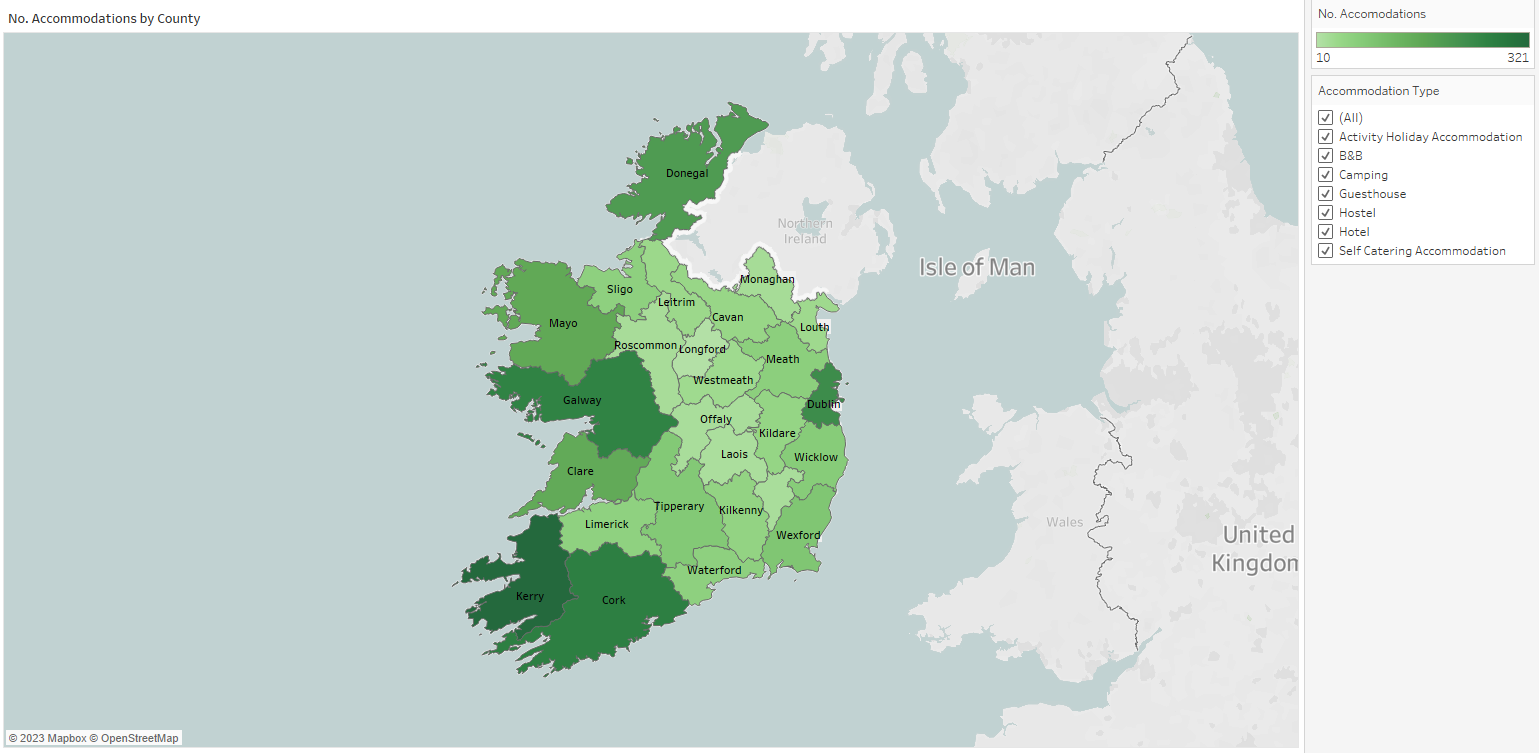

In [25]:
from IPython.display import Image
Image('/kaggle/input/irsh-accommodations-data/no_accommodations_by_county_map.png')

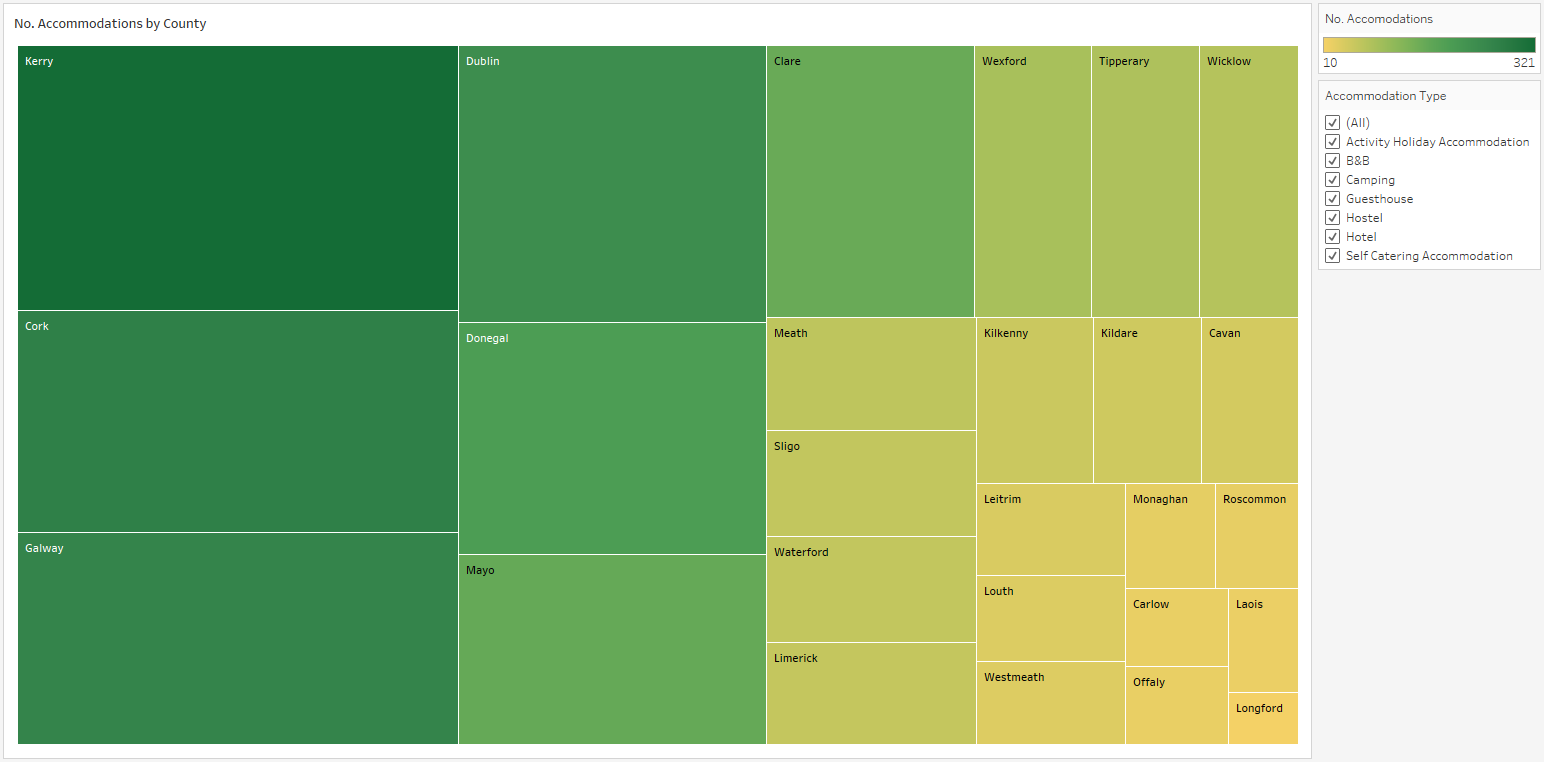

In [26]:
from IPython.display import Image
Image('/kaggle/input/irsh-accommodations-data/no_accommodations_by_county.png')

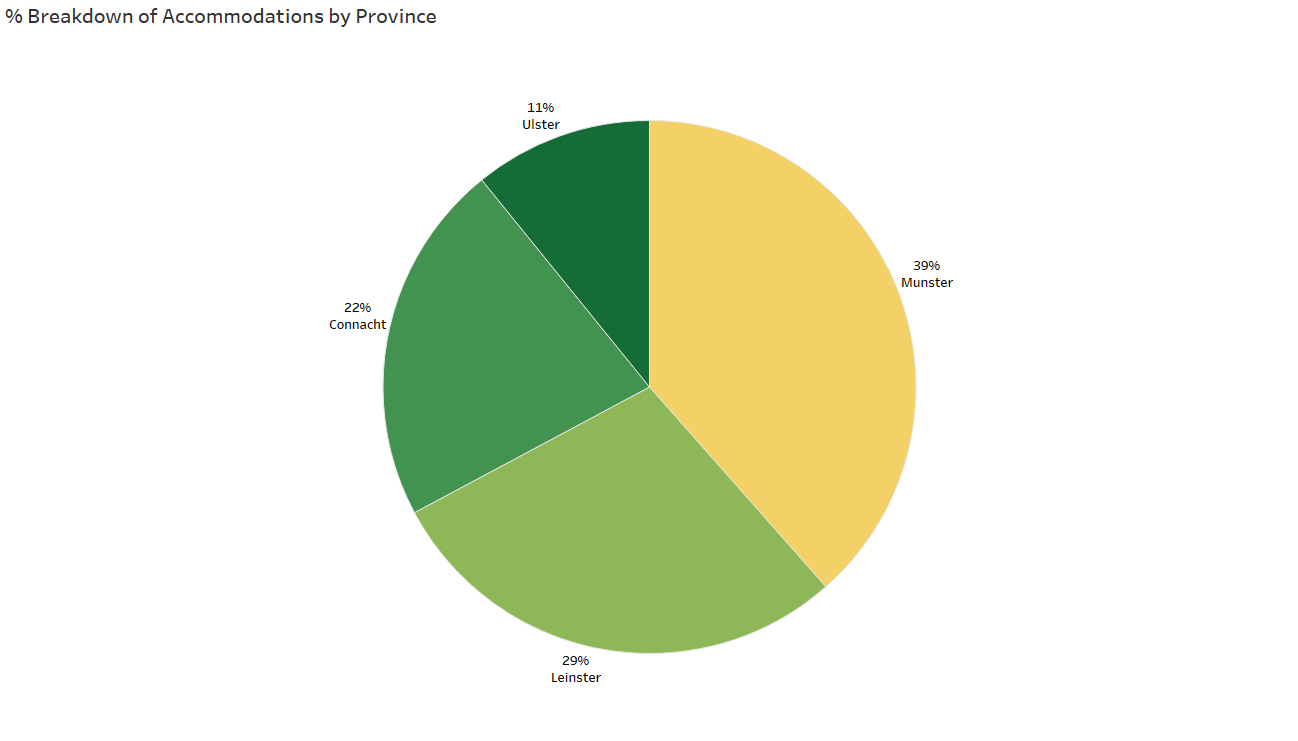

In [27]:
from IPython.display import Image
Image('/kaggle/input/irsh-accommodations-data/percentage_breakdown_of_accommodations_by_province.png')

### 6.1.2 Which towns have the highest number of accommodations?

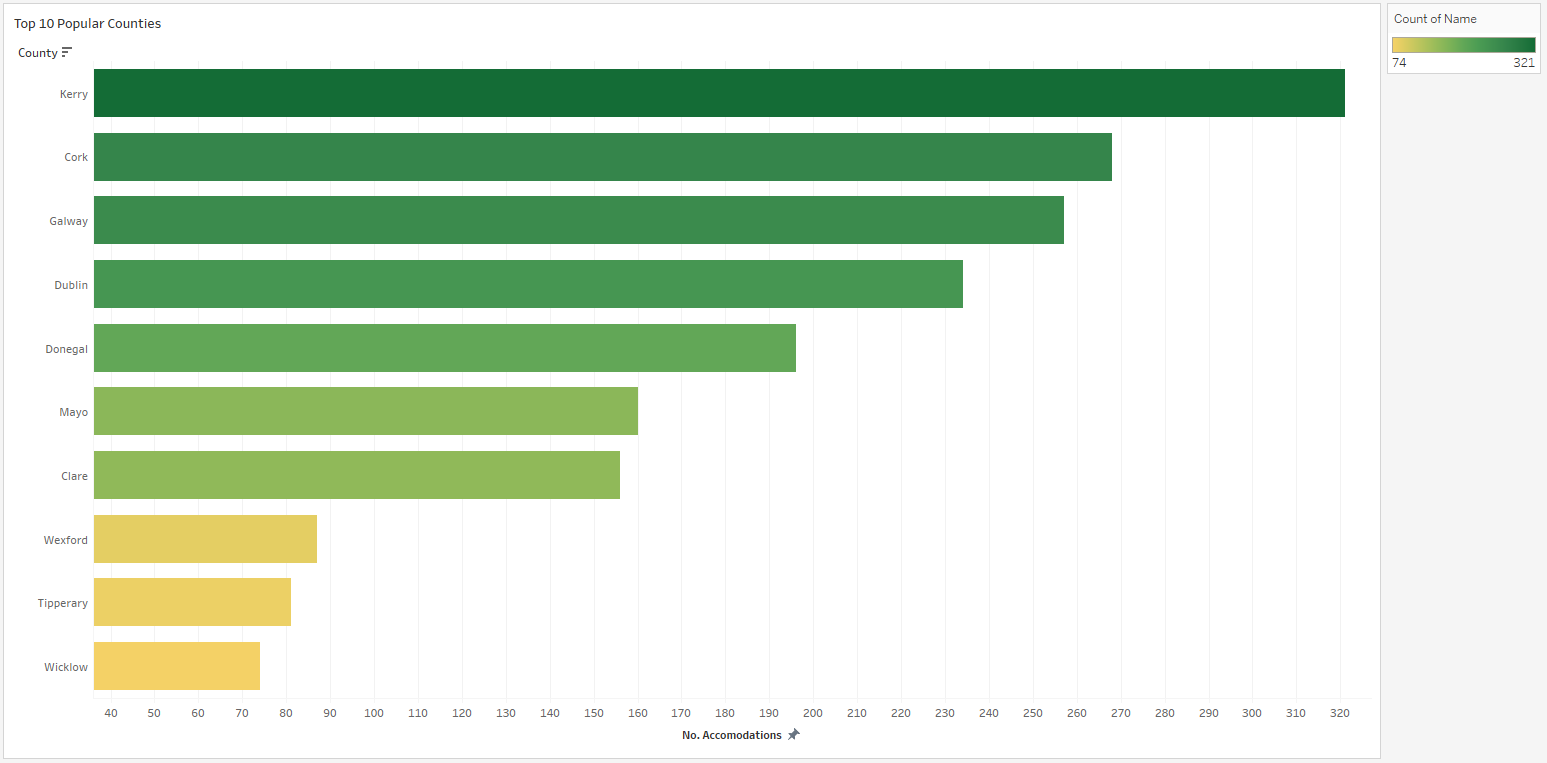

In [28]:
from IPython.display import Image
Image('/kaggle/input/irsh-accommodations-data/top_10_popular_counties.png')

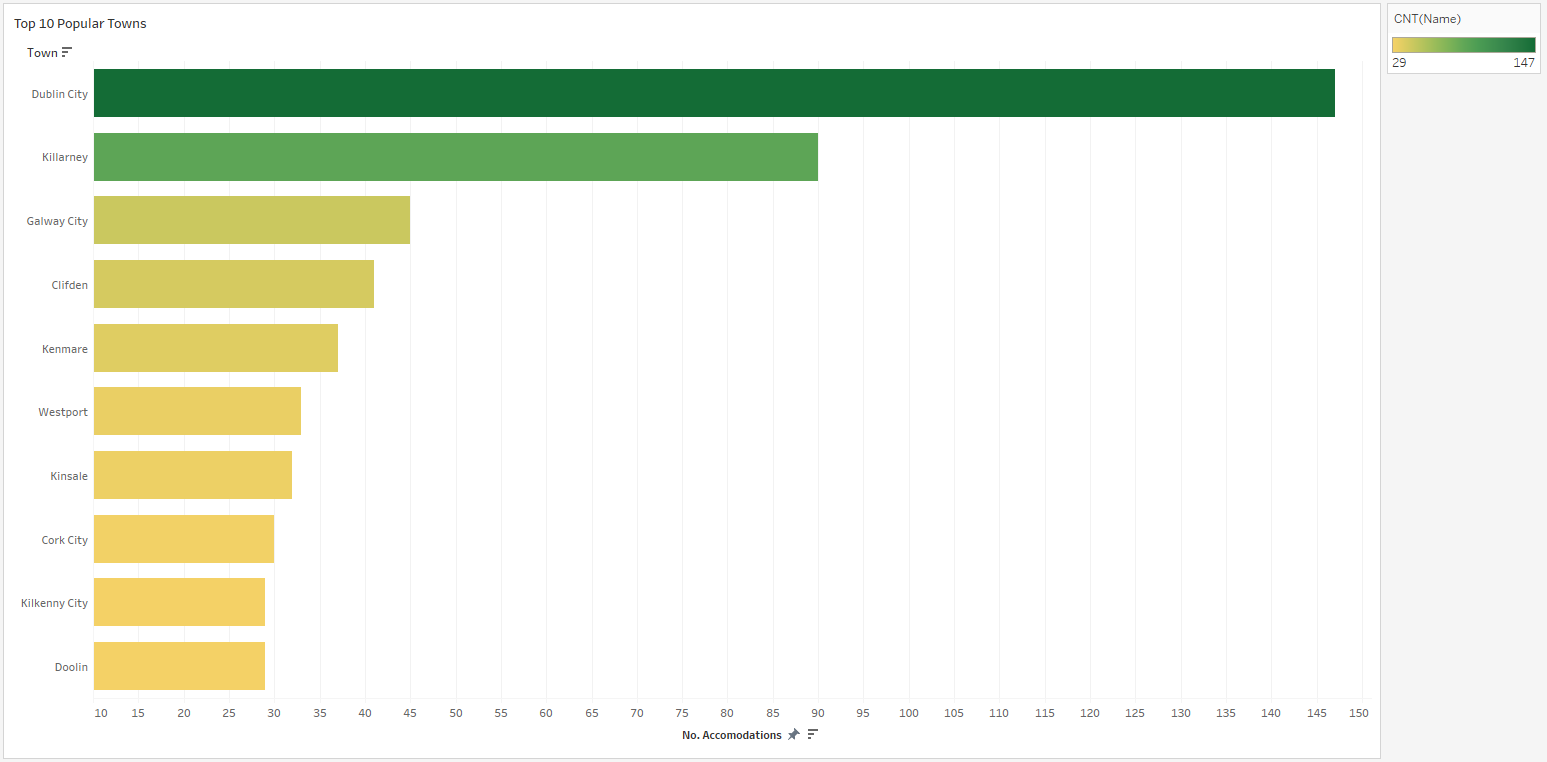

In [29]:
from IPython.display import Image
Image('/kaggle/input/irsh-accommodations-data/top_10_popular_towns.png')

## 6.2 Accommodation Type Analysis

### 6.2.1 What are the different types of accommodations? How are they distributed across the country?

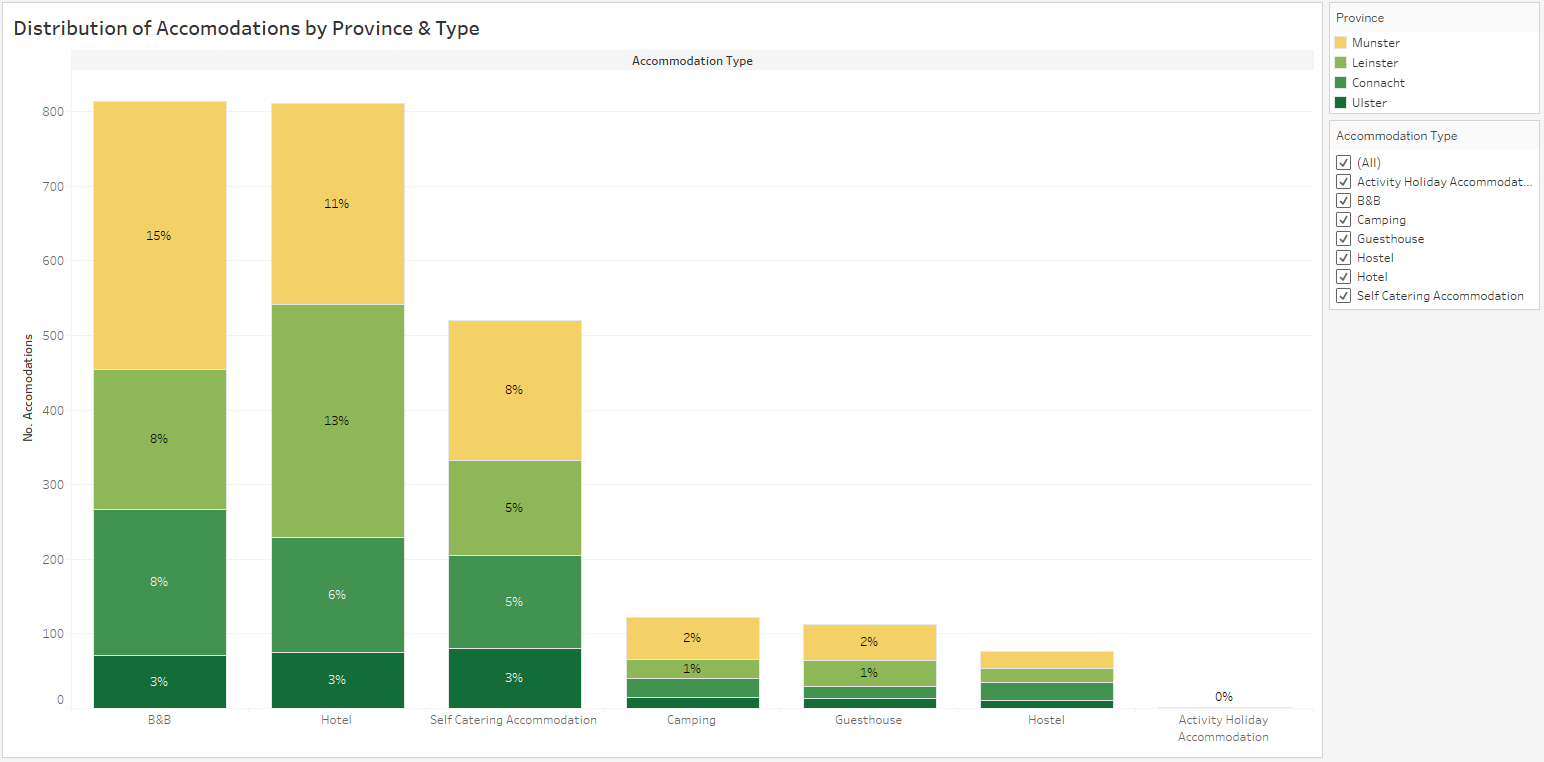

In [30]:
from IPython.display import Image
Image('/kaggle/input/irsh-accommodations-data/distribution_of_accommodations_by_type.png')

### 6.2.2 Which type of accommodation is most prevalent in each region?

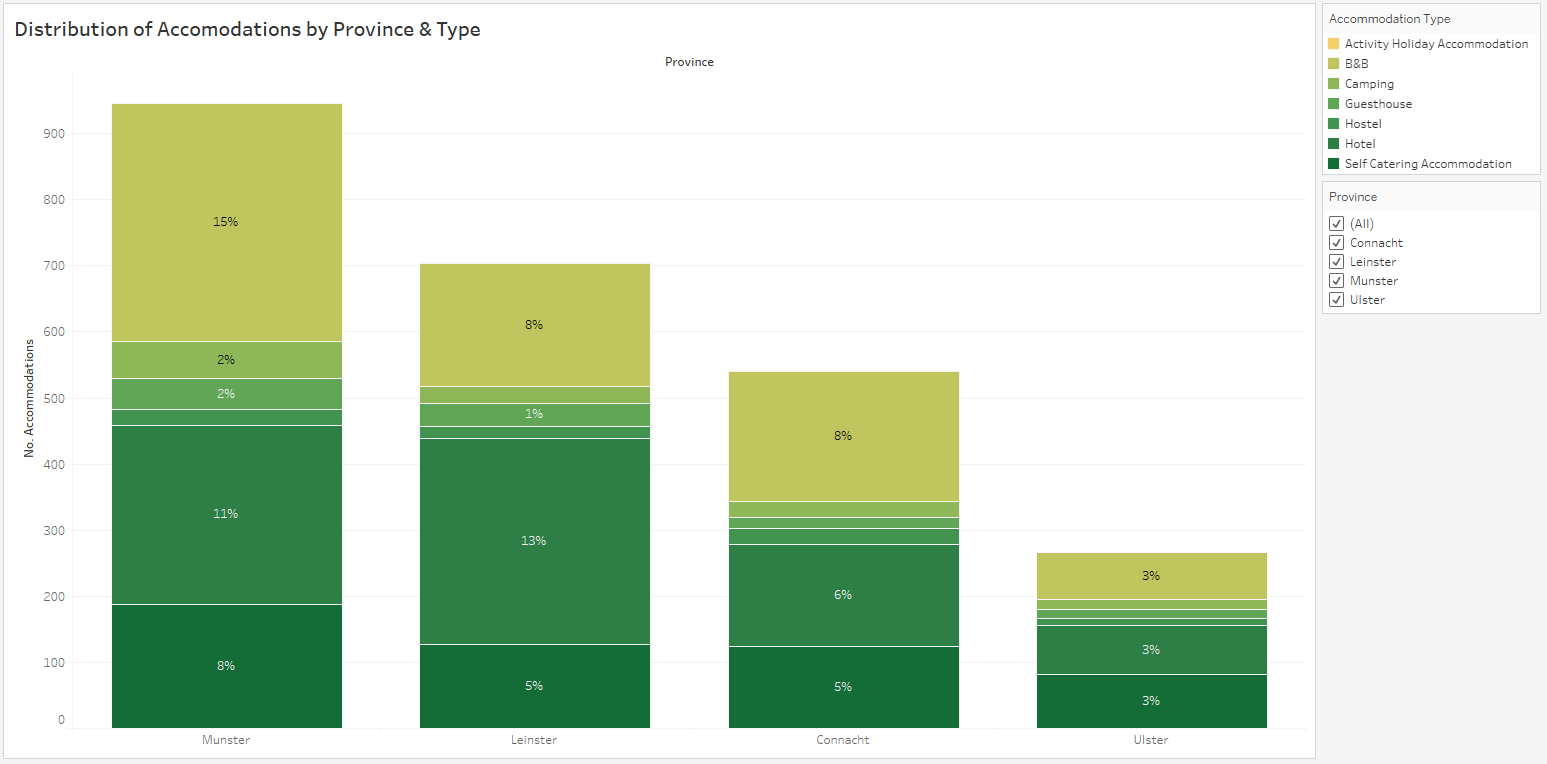

In [31]:
from IPython.display import Image
Image('/kaggle/input/irsh-accommodations-data/distribution_of_accommodations_by_province.png')

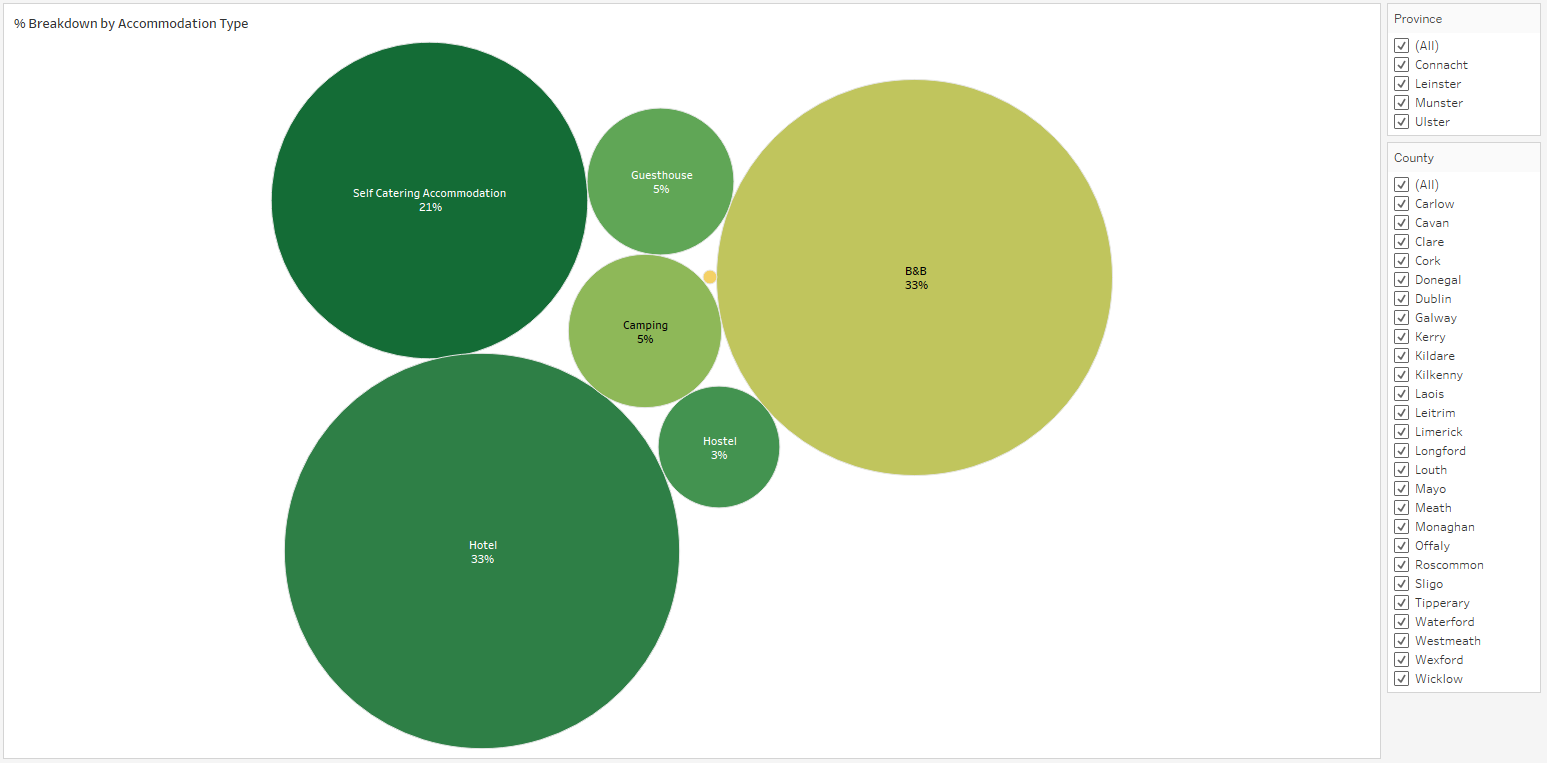

In [32]:
from IPython.display import Image
Image('/kaggle/input/irsh-accommodations-data/percentage_breakdown_by_accommodation_type.png')

## 6.3 General Analysis

### 6.3.1 Are there accommodations with the same name but in different localities or regions?

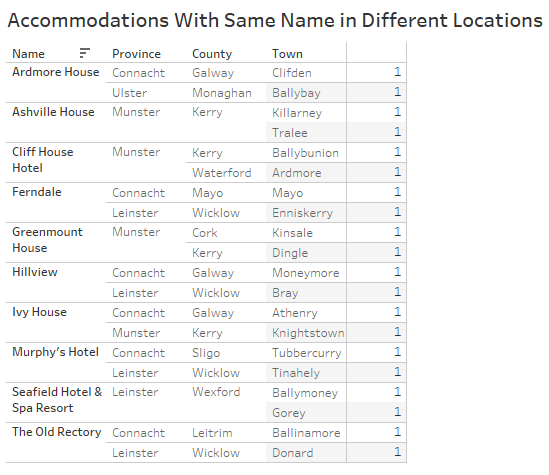

In [33]:
from IPython.display import Image
Image('/kaggle/input/irsh-accommodations-data/accommodations_with_same_name_in_different_locations.png')

## 6.4 Website Availability

### 6.4.1 What percentage of accommodations provide a URL?

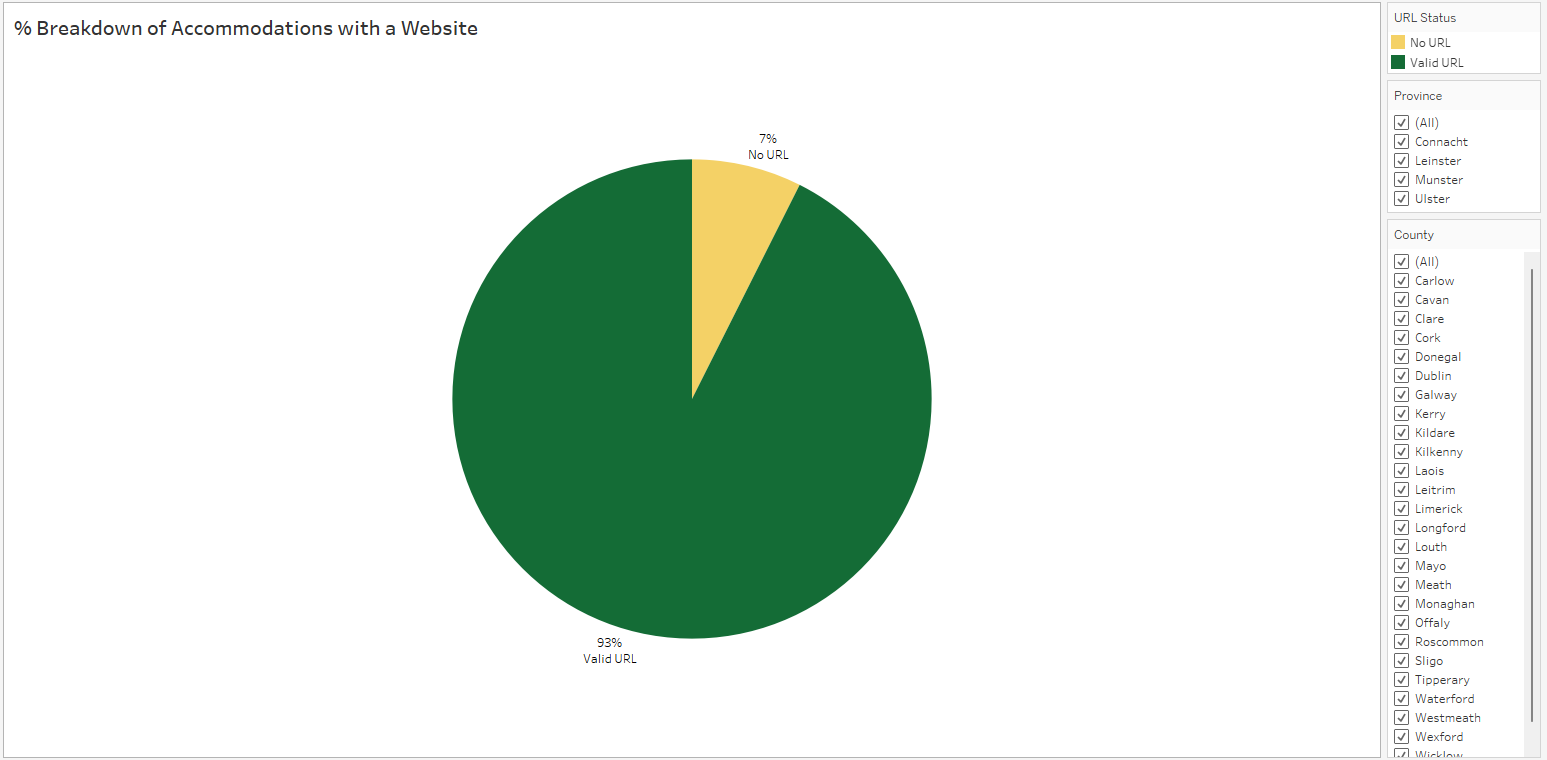

In [34]:
from IPython.display import Image
Image('/kaggle/input/irsh-accommodations-data/percentage_breakdown_of_accommodations_with_website.png')

### 6.4.2 Are there certain regions where accommodations are more likely to have a website?

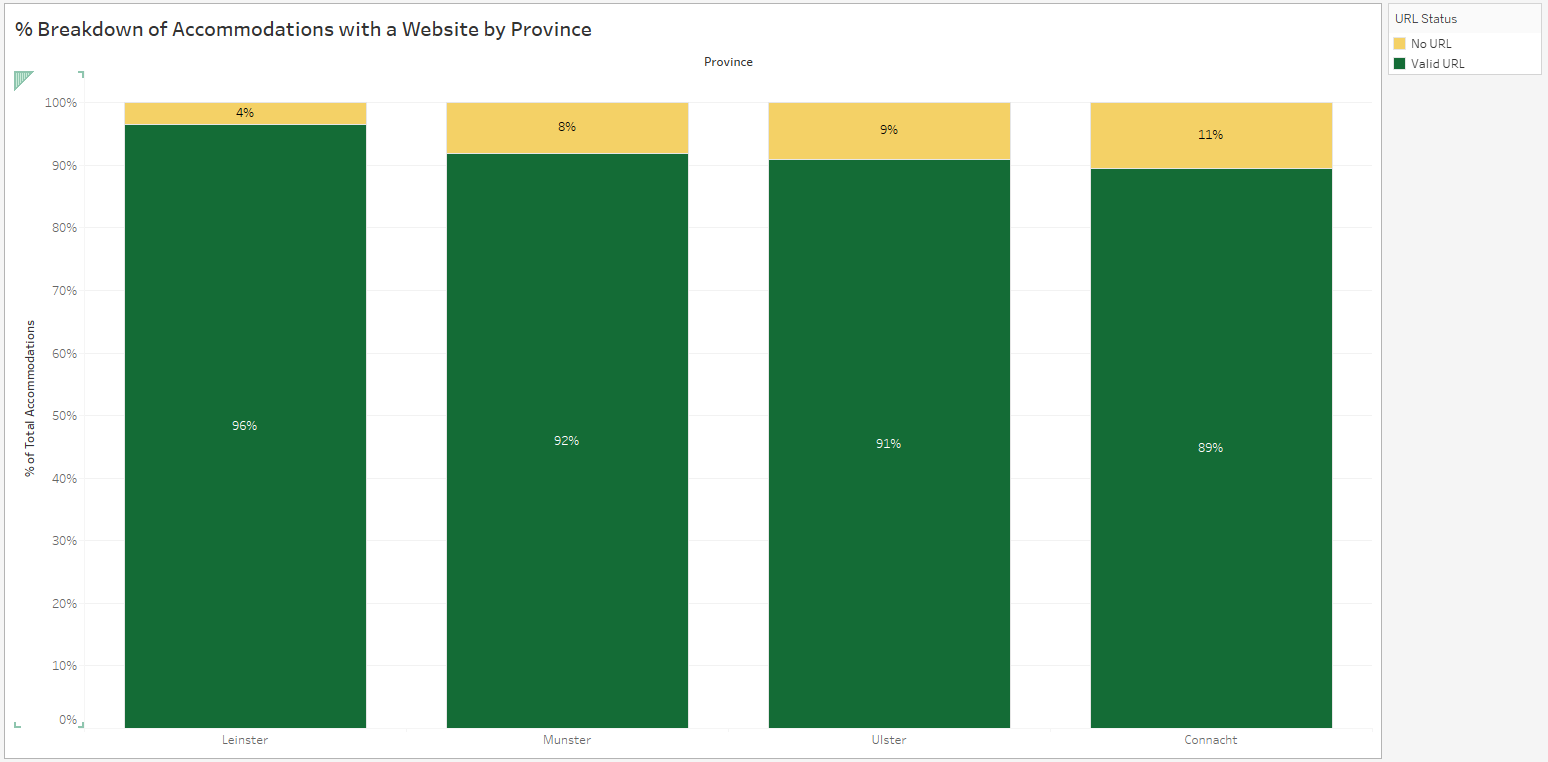

In [35]:
from IPython.display import Image
Image('/kaggle/input/irsh-accommodations-data/percentage_breakdown_of_accommodations_with_website_by_province.png')

### 6.4.3 Are there certain accomodation types which are more likely to have a website?

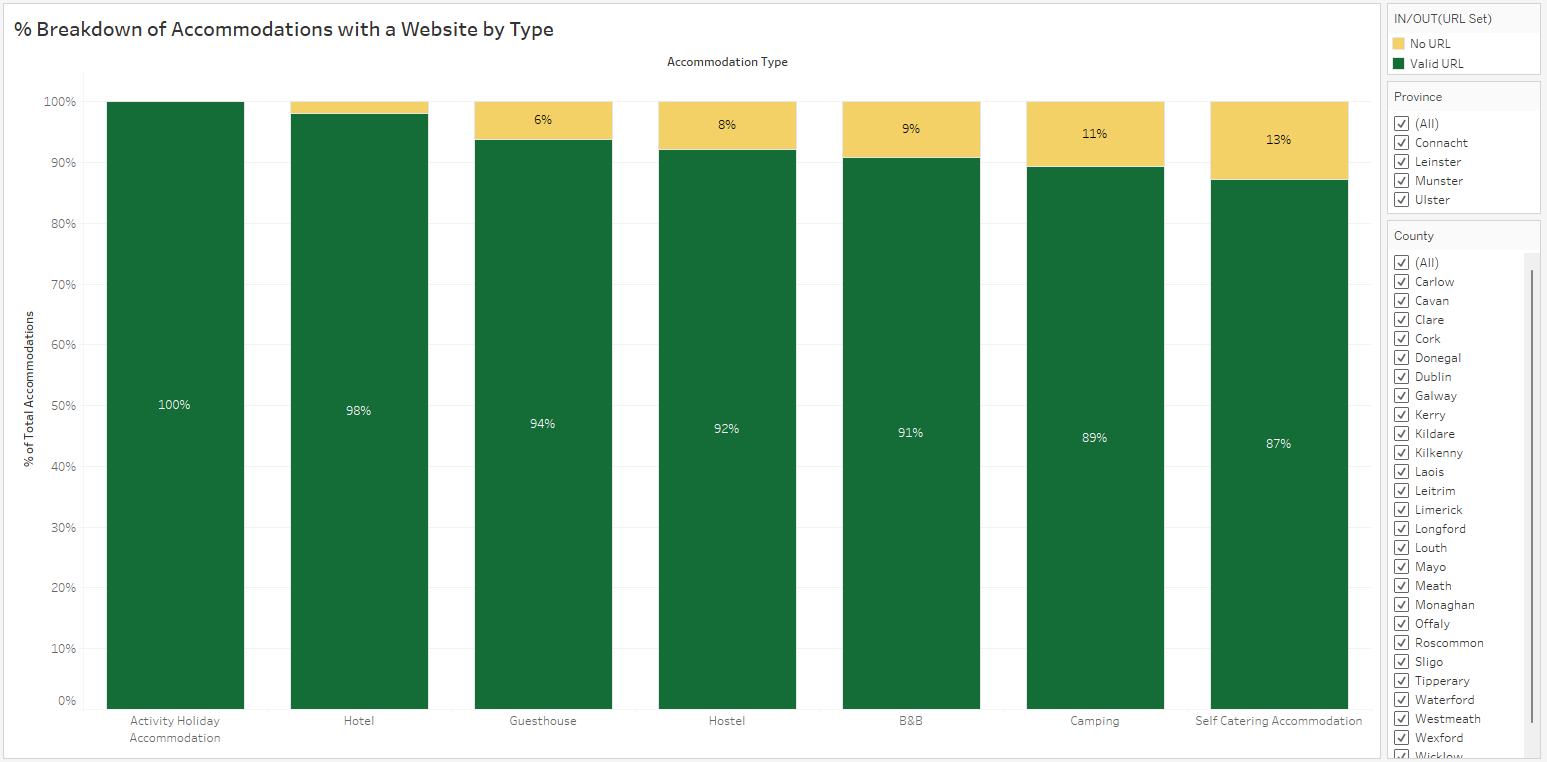

In [36]:
from IPython.display import Image
Image('/kaggle/input/irsh-accommodations-data/percentage_breakdown_of_accommodations_with_website_by_type.png')